In [120]:
import os
import pandas as pd
import numpy as np
import cv2
from typing import List
import matplotlib.pyplot as plt
import random

1. Forming a dataframe with columns "Absolute path" and "Class name".

In [42]:
df: pd.DataFrame = pd.read_csv('Annotasion.csv', usecols=["Absolute path", "Class name"])
print(df)

                                        Absolute path Class name
0      C:\Users\nasty\ap_laba2\dataset1\rose\0000.jpg       rose
1      C:\Users\nasty\ap_laba2\dataset1\rose\0001.jpg       rose
2      C:\Users\nasty\ap_laba2\dataset1\rose\0002.jpg       rose
3      C:\Users\nasty\ap_laba2\dataset1\rose\0003.jpg       rose
4      C:\Users\nasty\ap_laba2\dataset1\rose\0004.jpg       rose
...                                               ...        ...
1995  C:\Users\nasty\ap_laba2\dataset1\tulip\0995.jpg      tulip
1996  C:\Users\nasty\ap_laba2\dataset1\tulip\0996.jpg      tulip
1997  C:\Users\nasty\ap_laba2\dataset1\tulip\0997.jpg      tulip
1998  C:\Users\nasty\ap_laba2\dataset1\tulip\0998.jpg      tulip
1999  C:\Users\nasty\ap_laba2\dataset1\tulip\0999.jpg      tulip

[2000 rows x 2 columns]


2. Rename name columns.

In [43]:
df: pd.DataFrame = df.rename(columns={'Absolute path': 'absPath',
               'Class name': 'className'})
print(df)

                                              absPath className
0      C:\Users\nasty\ap_laba2\dataset1\rose\0000.jpg      rose
1      C:\Users\nasty\ap_laba2\dataset1\rose\0001.jpg      rose
2      C:\Users\nasty\ap_laba2\dataset1\rose\0002.jpg      rose
3      C:\Users\nasty\ap_laba2\dataset1\rose\0003.jpg      rose
4      C:\Users\nasty\ap_laba2\dataset1\rose\0004.jpg      rose
...                                               ...       ...
1995  C:\Users\nasty\ap_laba2\dataset1\tulip\0995.jpg     tulip
1996  C:\Users\nasty\ap_laba2\dataset1\tulip\0996.jpg     tulip
1997  C:\Users\nasty\ap_laba2\dataset1\tulip\0997.jpg     tulip
1998  C:\Users\nasty\ap_laba2\dataset1\tulip\0998.jpg     tulip
1999  C:\Users\nasty\ap_laba2\dataset1\tulip\0999.jpg     tulip

[2000 rows x 2 columns]


3. Adding a new column.

In [44]:
df["marks"] = 0
df.loc[df["className"] == "tulip", "marks"] = 1
print(df)

                                              absPath className  marks
0      C:\Users\nasty\ap_laba2\dataset1\rose\0000.jpg      rose      0
1      C:\Users\nasty\ap_laba2\dataset1\rose\0001.jpg      rose      0
2      C:\Users\nasty\ap_laba2\dataset1\rose\0002.jpg      rose      0
3      C:\Users\nasty\ap_laba2\dataset1\rose\0003.jpg      rose      0
4      C:\Users\nasty\ap_laba2\dataset1\rose\0004.jpg      rose      0
...                                               ...       ...    ...
1995  C:\Users\nasty\ap_laba2\dataset1\tulip\0995.jpg     tulip      1
1996  C:\Users\nasty\ap_laba2\dataset1\tulip\0996.jpg     tulip      1
1997  C:\Users\nasty\ap_laba2\dataset1\tulip\0997.jpg     tulip      1
1998  C:\Users\nasty\ap_laba2\dataset1\tulip\0998.jpg     tulip      1
1999  C:\Users\nasty\ap_laba2\dataset1\tulip\0999.jpg     tulip      1

[2000 rows x 3 columns]


4. Adding columns with information about height, width and depth.

In [57]:
height_i: List[int] = []
width_i: List[int] = []
depth_i: List[int] = []

for i in range(df["absPath"].size):
    img = cv2.imread(df["absPath"].iloc[i])
    if img is not None:
      height_i.append(img.shape[0])
      width_i.append(img.shape[1])
      depth_i.append(img.shape[2])
    else:
       print(df["absPath"].iloc[i])

df["height"] = height_i
df["width"] = width_i
df["depth"] = depth_i
print(df)

                                              absPath className  marks  \
0      C:\Users\nasty\ap_laba2\dataset1\rose\0000.jpg      rose      0   
1      C:\Users\nasty\ap_laba2\dataset1\rose\0001.jpg      rose      0   
2      C:\Users\nasty\ap_laba2\dataset1\rose\0002.jpg      rose      0   
3      C:\Users\nasty\ap_laba2\dataset1\rose\0003.jpg      rose      0   
4      C:\Users\nasty\ap_laba2\dataset1\rose\0004.jpg      rose      0   
...                                               ...       ...    ...   
1995  C:\Users\nasty\ap_laba2\dataset1\tulip\0995.jpg     tulip      1   
1996  C:\Users\nasty\ap_laba2\dataset1\tulip\0996.jpg     tulip      1   
1997  C:\Users\nasty\ap_laba2\dataset1\tulip\0997.jpg     tulip      1   
1998  C:\Users\nasty\ap_laba2\dataset1\tulip\0998.jpg     tulip      1   
1999  C:\Users\nasty\ap_laba2\dataset1\tulip\0999.jpg     tulip      1   

      height  width  depth  
0       1600   2400      3  
1       1125   1500      3  
2       1200   1920     

5. Output of statistical information for columns: height, depth, width, marks.

In [48]:
stats_m = df['marks'].describe() 
stats_h = df['height'].describe() 
stats_w = df['width'].describe() 
stats_d = df['depth'].describe() 
print("\nstatistical information for marks\n", stats_m)
print("\nstatistical information for height\n", stats_h)
print("\nstatistical information for width\n", stats_w)
print("\nstatistical information for depth\n", stats_d)


statistical information for marks
 count    2000.000000
mean        0.500000
std         0.500125
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: marks, dtype: float64

statistical information for height
 count    2000.00000
mean     1404.41500
std       585.06188
min       157.00000
25%      1050.00000
50%      1214.50000
75%      1728.25000
max      7498.00000
Name: height, dtype: float64

statistical information for width
 count    2000.000000
mean     1958.948000
std       785.311372
min       308.000000
25%      1292.000000
50%      1920.000000
75%      2560.000000
max      8000.000000
Name: width, dtype: float64

statistical information for depth
 count    2000.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: depth, dtype: float64


6. Filtering DataFrame by a given label.

In [81]:
def filtered_df(df: pd.DataFrame, mark: int) -> pd.DataFrame:
    df: pd.DataFrame = df[df.marks == mark]
    return df

print(filtered_df(df, 1))

                                              absPath className  marks  \
1000  C:\Users\nasty\ap_laba2\dataset1\tulip\0000.jpg     tulip      1   
1001  C:\Users\nasty\ap_laba2\dataset1\tulip\0001.jpg     tulip      1   
1002  C:\Users\nasty\ap_laba2\dataset1\tulip\0002.jpg     tulip      1   
1003  C:\Users\nasty\ap_laba2\dataset1\tulip\0003.jpg     tulip      1   
1004  C:\Users\nasty\ap_laba2\dataset1\tulip\0004.jpg     tulip      1   
...                                               ...       ...    ...   
1995  C:\Users\nasty\ap_laba2\dataset1\tulip\0995.jpg     tulip      1   
1996  C:\Users\nasty\ap_laba2\dataset1\tulip\0996.jpg     tulip      1   
1997  C:\Users\nasty\ap_laba2\dataset1\tulip\0997.jpg     tulip      1   
1998  C:\Users\nasty\ap_laba2\dataset1\tulip\0998.jpg     tulip      1   
1999  C:\Users\nasty\ap_laba2\dataset1\tulip\0999.jpg     tulip      1   

      height  width  depth    pixel  
1000    1363   2048      3  2791424  
1001    2146   3000      3  6438000

7. 

In [54]:
def filtered_df2(mark: int, max_width: int, max_height: int, df: pd.DataFrame) -> pd.DataFrame:
    df: pd.DataFrame = df[df.marks == mark][df.width <= max_width][df.height <= max_height]
    return df

print(filtered_df2(0, 2000, 2000, df))

                                            absPath className  marks  height  \
1    C:\Users\nasty\ap_laba2\dataset1\rose\0001.jpg      rose      0    1125   
2    C:\Users\nasty\ap_laba2\dataset1\rose\0002.jpg      rose      0    1200   
4    C:\Users\nasty\ap_laba2\dataset1\rose\0004.jpg      rose      0    1200   
5    C:\Users\nasty\ap_laba2\dataset1\rose\0005.jpg      rose      0     764   
7    C:\Users\nasty\ap_laba2\dataset1\rose\0007.jpg      rose      0     853   
..                                              ...       ...    ...     ...   
987  C:\Users\nasty\ap_laba2\dataset1\rose\0987.jpg      rose      0    1104   
988  C:\Users\nasty\ap_laba2\dataset1\rose\0988.jpg      rose      0     768   
991  C:\Users\nasty\ap_laba2\dataset1\rose\0991.jpg      rose      0     768   
993  C:\Users\nasty\ap_laba2\dataset1\rose\0993.jpg      rose      0     800   
999  C:\Users\nasty\ap_laba2\dataset1\rose\0999.jpg      rose      0    1303   

     width  depth  
1     1500      3  

C:\Users\nasty\AppData\Local\Temp\ipykernel_45776\86508840.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.marks == mark][df.width <= max_width][df.height <= max_height]
C:\Users\nasty\AppData\Local\Temp\ipykernel_45776\86508840.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.marks == mark][df.width <= max_width][df.height <= max_height]


8.

In [64]:
df["pixel"] = df.height * df.width
result: pd.DataFrame = df.groupby("marks").agg({"pixel": ['mean', 'min', 'max']}) 
print(result)

             pixel                  
              mean     min       max
marks                               
0      3206052.242  105920  59984000
1      3049891.072   75360  25809486


9. 

In [123]:
def create_histogram(df: pd.DataFrame, mark: int) -> List[int]:
    new_df: pd.DataFrame = filtered_df(df, mark)
    image_path:str = new_df["absPath"].iloc[random.randint(0, 1000)]
    image = cv2.imread(image_path)
    color = []
    for i in range(0, 3):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        color.append(histr)
    return color

10.

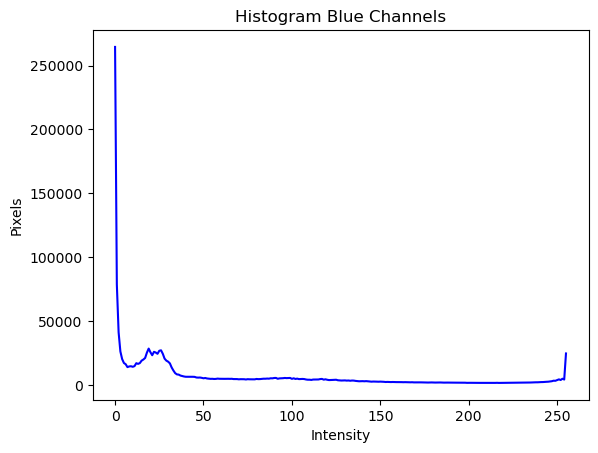

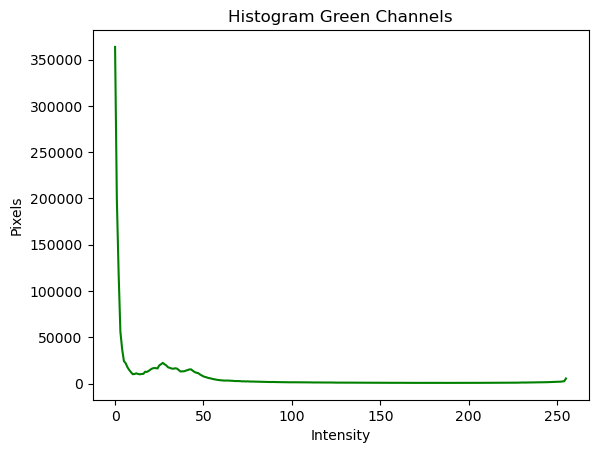

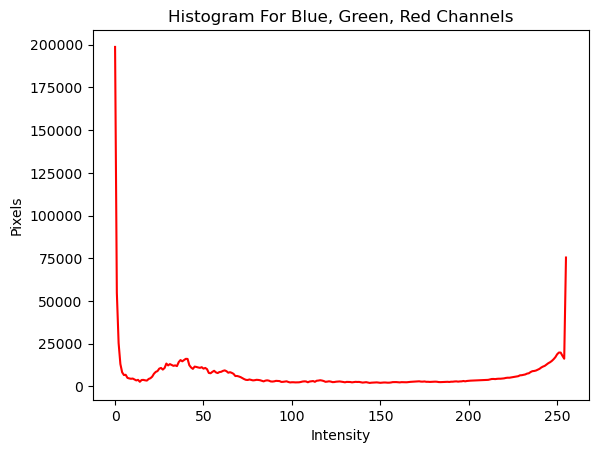

In [127]:
def histogram_rendering(df: pd.DataFrame, mark: int) -> None:
    histr = create_histogram(df, mark)
    
    plt.plot(hist[0], color="b")
    plt.title("Histogram Blue Channels")
    plt.xlabel("Intensity")
    plt.ylabel("Pixels")
    plt.show()

    plt.plot(hist[1], color="g")
    plt.title("Histogram Green Channels")
    plt.xlabel("Intensity")
    plt.ylabel("Pixels")
    plt.show()

    plt.plot(hist[2], color="r")
    plt.title("Histogram For Blue, Green, Red Channels")
    plt.xlabel("Intensity")
    plt.ylabel("Pixels")
    plt.show()

histogram_rendering(df, 0)